In [1]:
from methods import *
import os, shutil

In [4]:
word2vec_len = 300

word2vec_pickle = dataset_folder + '/word2vec.p'

In [3]:
output_file_weda = "tsne" + '/train_weda.txt'
train_orig = "tsne/train_orig.txt"
gen_standard_aug_weda(train_orig, output_file_weda, num_aug=9)

finished weda for tsne/train_orig.txt to tsne/train_weda.txt


In [10]:
huge_word2vec = 'word2vec/glove.840B.300d.txt'

gen_vocab_dicts(dataset_folder, word2vec_pickle, huge_word2vec)

['tsne/test.txt', 'tsne/train_orig.txt', 'tsne/train_weda.txt']
27936 unique words found
20835 matches between unique words and word2vec dictionary
dictionaries outputted to tsne/word2vec.p


In [5]:
def run_cnn_tsne(train_file, test_file, num_classes, input_size, percent_dataset):
    word2vec_pickle = "tsne" + '/word2vec.p'
    word2vec = load_pickle(word2vec_pickle)
        
    #initialize model
    model = build_cnn(input_size, word2vec_len, num_classes)

    #load data
    train_x, train_y = get_x_y(train_file, num_classes, word2vec_len, input_size, word2vec, percent_dataset)
    test_x, test_y = get_x_y(test_file, num_classes, word2vec_len, input_size, word2vec, 1)

    #implement early stopping
    callbacks = [EarlyStopping(monitor='val_loss', patience=3)]

    #train model
    model.fit(	train_x, 
                train_y, 
                epochs=100, 
                callbacks=callbacks,
                validation_split=0.1, 
                batch_size=1024, 
                shuffle=True, 
                verbose=1)
    #model.save('checkpoints/lol')
    #model = load_model('checkpoints/lol')

    #evaluate model
    y_pred = model.predict(test_x)
    test_y_cat = one_hot_to_categorical(test_y)
    y_pred_cat = one_hot_to_categorical(y_pred)
    acc = accuracy_score(test_y_cat, y_pred_cat)

    #clean memory???
    train_x, train_y = None, None
    gc.collect()

    #return the accuracy
    #print("data with shape:", train_x.shape, train_y.shape, 'train=', train_file, 'test=', test_file, 'with fraction', percent_dataset, 'had acc', acc)
    return acc, model



In [6]:
#for storing last layer representations
last_layer_cnn_no_aug = []
last_layer_cnn_aug = []


#initialize all the variables
dataset_folder = "tsne"
num_classes = 2
input_size = 50
word2vec_pickle = dataset_folder + '/word2vec.p'
word2vec = load_pickle(word2vec_pickle)

train_path = 'tsne/train_orig.txt'
test_path = 'tsne/test.txt'
acc, model = run_cnn_tsne(train_path, test_path, num_classes, input_size, percent_dataset=1)
print("cnn", acc)   
model.pop()

Epoch 1/100
7/7 [==============================] - 2s 198ms/step - loss: 0.6753 - accuracy: 0.5562 - val_loss: 0.6217 - val_accuracy: 0.7135
Epoch 2/100
7/7 [==============================] - 1s 160ms/step - loss: 0.5932 - accuracy: 0.7517 - val_loss: 0.5452 - val_accuracy: 0.7635
Epoch 3/100
7/7 [==============================] - 1s 160ms/step - loss: 0.5080 - accuracy: 0.7941 - val_loss: 0.4816 - val_accuracy: 0.7838
Epoch 4/100
7/7 [==============================] - 1s 168ms/step - loss: 0.4342 - accuracy: 0.8136 - val_loss: 0.4436 - val_accuracy: 0.7932
Epoch 5/100
7/7 [==============================] - 1s 187ms/step - loss: 0.3819 - accuracy: 0.8305 - val_loss: 0.4316 - val_accuracy: 0.7878
Epoch 6/100
7/7 [==============================] - 1s 172ms/step - loss: 0.3531 - accuracy: 0.8463 - val_loss: 0.4293 - val_accuracy: 0.7959
Epoch 7/100
7/7 [==============================] - 1s 178ms/step - loss: 0.3156 - accuracy: 0.8698 - val_loss: 0.4213 - val_accuracy: 0.7986
Epoch 8/100
7

In [8]:
#load data
output_file_weda = "tsne/train_weda.txt"
test_orig = "tsne/test.txt"
orig_x, orig_y = get_x_y(test_orig, num_classes, word2vec_len, input_size, word2vec, 1)
aug_x, aug_y = get_x_y(output_file_weda, num_classes, word2vec_len, input_size, word2vec, 1)


output_orig_x = model(orig_x)
output_aug_x = model(aug_x)


In [9]:
print(output_orig_x.shape)

(1749, 20)


In [10]:
output_orig_x = np.array(output_orig_x)

## Test alone

In [12]:
# do tsne on output orig_x + plot
print(output_orig_x.shape)
from sklearn.manifold import TSNE

nb_points = 30
print(orig_y.shape)
pos_idx = np.where(orig_y[:,0] == 1)[0][:nb_points]
neg_idx = np.where(orig_y[:,0] == 0)[0][:nb_points]
print(np.where(orig_y == 1)[0])
idx_reduced = np.concatenate((pos_idx, neg_idx))
print(idx_reduced)
output_orig_x_reduced = []
for idx in idx_reduced:
    output_orig_x_reduced.append(output_orig_x[idx])
    
output_orig_x_reduced = np.array(output_orig_x_reduced)

print(output_orig_x_reduced.shape)

tsne = TSNE(n_components=2, init='random')
orig_tsne =  tsne.fit_transform(output_orig_x_reduced)



(1749, 20)
(1749, 2)
[   0    1    2 ... 1746 1747 1748]
[ 0  1  4  5  7  8 10 12 13 14 17 18 21 23 24 27 28 29 30 32 33 34 35 36
 37 38 41 42 43 46  2  3  6  9 11 15 16 19 20 22 25 26 31 39 40 44 45 48
 49 50 51 52 55 60 61 63 66 67 70 75]
(60, 20)


(60, 2)


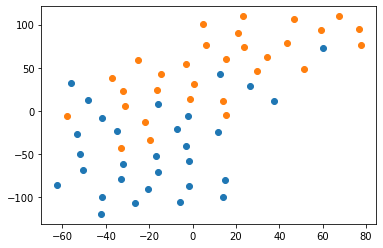

In [13]:
import matplotlib.pyplot as plt
print(orig_tsne.shape)


plt.scatter(orig_tsne[:nb_points,0], orig_tsne[:nb_points,1])
plt.scatter(orig_tsne[nb_points:,0], orig_tsne[nb_points:,1])
plt.show()
# TODO: properly plot this with colours, smaller subset of the dataset and then plot also the augmented data

## Aug alone

In [15]:
# do tsne on output orig_x + plot
print(output_aug_x.shape)
from sklearn.manifold import TSNE
n_aug = 9
nb_points = 30
print(aug_y.shape)
pos_idx = np.where(aug_y[:,0] == 1)[0][:nb_points*n_aug]
neg_idx = np.where(aug_y[:,0] == 0)[0][:nb_points*n_aug]
print(np.where(aug_y == 1)[0])
idx_reduced = np.concatenate((pos_idx, neg_idx))
print(idx_reduced)
output_aug_x_reduced = []
for idx in idx_reduced:
    output_aug_x_reduced.append(output_aug_x[idx])
    
output_aug_x_reduced = np.array(output_aug_x_reduced)

print(output_aug_x_reduced.shape)

tsne = TSNE(n_components=2, init='random')
aug_tsne =  tsne.fit_transform(output_aug_x_reduced)




(73930, 20)
(73930, 2)
[    0     1     2 ... 73927 73928 73929]
[  1   6   7  11  16  22  24  28  29  30  31  37  38  39  43  44  48  49
  51  52  53  57  59  60  61  62  64  67  68  69  70  74  77  89  90  91
  93  95  98  99 100 102 104 105 107 108 110 111 113 115 117 120 125 128
 133 135 141 144 145 146 147 149 150 152 156 162 163 165 166 167 170 172
 173 177 178 180 182 183 186 190 191 192 193 196 197 207 208 209 212 213
 215 216 217 221 224 225 227 228 231 232 236 238 239 242 243 244 246 249
 251 254 256 257 258 259 260 263 264 265 266 268 269 271 272 273 274 277
 278 279 282 284 291 295 298 301 302 303 304 305 306 307 309 311 314 315
 316 318 320 321 322 323 325 327 328 329 330 332 334 339 343 344 345 348
 349 352 359 363 365 367 369 370 371 374 378 381 384 389 391 394 395 396
 403 404 405 409 410 411 413 414 415 418 419 420 422 425 426 427 428 429
 430 432 433 434 435 437 438 441 442 443 445 446 447 449 451 452 453 455
 458 461 463 464 465 467 468 470 472 473 475 476 478 479 48

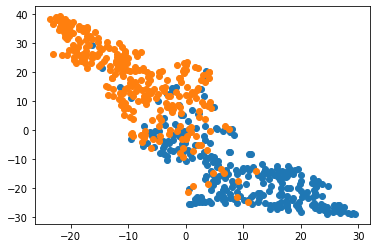

In [18]:
plt.scatter(aug_tsne[:nb_points*n_aug,0], aug_tsne[:nb_points*n_aug,1])
plt.scatter(aug_tsne[nb_points*n_aug:,0], aug_tsne[nb_points*n_aug:,1])
plt.show()

## Aug and Test

In [21]:
# do tsne on output orig_x + plot
print(output_aug_x.shape)
from sklearn.manifold import TSNE

n_aug = 9
nb_points = 30
print(aug_y.shape)
pos_idx = np.where(aug_y[:,0] == 1)[0][:nb_points*n_aug]
neg_idx = np.where(aug_y[:,0] == 0)[0][:nb_points*n_aug]
print(np.where(aug_y == 1)[0])
idx_reduced = np.concatenate((pos_idx, neg_idx))
print(idx_reduced)
output_aug_x_reduced = []
for idx in idx_reduced:
    output_aug_x_reduced.append(output_aug_x[idx])
    
output_aug_x_reduced = np.array(output_aug_x_reduced)

print(output_aug_x_reduced.shape)


pos_idx = np.where(orig_y[:,0] == 1)[0][:nb_points]
neg_idx = np.where(orig_y[:,0] == 0)[0][:nb_points]
print(np.where(orig_y == 1)[0])
idx_reduced = np.concatenate((pos_idx, neg_idx))
print(idx_reduced)
output_orig_x_reduced = []
for idx in idx_reduced:
    output_orig_x_reduced.append(output_orig_x[idx])
    
output_orig_x_reduced = np.array(output_orig_x_reduced)

print(output_orig_x_reduced.shape)

output_combined_x_reduced = np.concatenate((output_orig_x_reduced, output_aug_x_reduced))
print(output_combined_x_reduced.shape)


tsne = TSNE(n_components=2, init='random')
combined_tsne =  tsne.fit_transform(output_combined_x_reduced)





(73930, 20)
(73930, 2)
[    0     1     2 ... 73927 73928 73929]
[  1   6   7  11  16  22  24  28  29  30  31  37  38  39  43  44  48  49
  51  52  53  57  59  60  61  62  64  67  68  69  70  74  77  89  90  91
  93  95  98  99 100 102 104 105 107 108 110 111 113 115 117 120 125 128
 133 135 141 144 145 146 147 149 150 152 156 162 163 165 166 167 170 172
 173 177 178 180 182 183 186 190 191 192 193 196 197 207 208 209 212 213
 215 216 217 221 224 225 227 228 231 232 236 238 239 242 243 244 246 249
 251 254 256 257 258 259 260 263 264 265 266 268 269 271 272 273 274 277
 278 279 282 284 291 295 298 301 302 303 304 305 306 307 309 311 314 315
 316 318 320 321 322 323 325 327 328 329 330 332 334 339 343 344 345 348
 349 352 359 363 365 367 369 370 371 374 378 381 384 389 391 394 395 396
 403 404 405 409 410 411 413 414 415 418 419 420 422 425 426 427 428 429
 430 432 433 434 435 437 438 441 442 443 445 446 447 449 451 452 453 455
 458 461 463 464 465 467 468 470 472 473 475 476 478 479 48

In [ ]:
plt.scatter(combined_tsne[:nb_points,0], combined_tsne[:nb_points*n_aug,1])
plt.scatter(combined_tsne[nb_points:nb_points*2,0], combined_tsne[nb_points:nb_points*2,1])
plt.scatter(combined_tsne[nb_points*2:nb_points*(n_aug+1),0], combined_tsne[:nb_points*n_aug,1])
plt.scatter(combined_tsne[nb_points*n_aug:,0], combined_tsne[nb_points*n_aug:,1])
plt.show()